In [3]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold  
# data directory
DATA_DIR = os.path.join('..', 'data', 'processed')

In [4]:
'''

data_paths = {'A': {'train': os.path.join("home/Applied Machine Learning/Predicting Poverty",  'A_hhold_train.csv'), 
                    'test':  os.path.join("home/Applied Machine Learning/Predicting Poverty",  'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv')}}
                    
'''

'\n\ndata_paths = {\'A\': {\'train\': os.path.join("home/Applied Machine Learning/Predicting Poverty",  \'A_hhold_train.csv\'), \n                    \'test\':  os.path.join("home/Applied Machine Learning/Predicting Poverty",  \'A_hhold_test.csv\')}, \n              \n              \'B\': {\'train\': os.path.join(DATA_DIR, \'B\', \'B_hhold_train.csv\'), \n                    \'test\':  os.path.join(DATA_DIR, \'B\', \'B_hhold_test.csv\')}, \n              \n              \'C\': {\'train\': os.path.join(DATA_DIR, \'C\', \'C_hhold_train.csv\'), \n                    \'test\':  os.path.join(DATA_DIR, \'C\', \'C_hhold_test.csv\')}}\n                    \n'

In [5]:
# load training data
#a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
#b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
#c_train = pd.read_csv(data_paths['C']['train'], index_col='id')


# load test data
#a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
#b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
#c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [6]:
# load training data
a_train = pd.read_csv('A_hhold_train.csv', index_col='id')
b_train = pd.read_csv('B_hhold_train.csv', index_col='id')
c_train = pd.read_csv('C_hhold_train.csv', index_col='id')

In [7]:
# load test data
a_test = pd.read_csv('A_hhold_test.csv', index_col='id')
b_test = pd.read_csv('B_hhold_test.csv', index_col='id')
c_test = pd.read_csv('C_hhold_test.csv', index_col='id')

In [8]:
#a_train.head()
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [9]:
b_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [10]:
c_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


In [11]:
a_train.shape
#A: 8203 examples, 345 features (每个国家的example和feature个数都不一样，所以每个国家要单独训练)

(8203, 345)

In [9]:
b_train.shape
#B: 3255 examples, 442 features

(3255, 442)

In [10]:
c_train.shape
#C: 6469 examples, 164 features

(6469, 164)

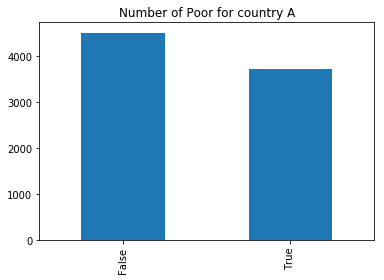

In [11]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

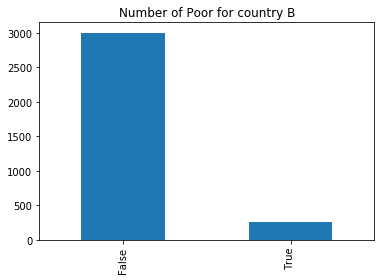

In [12]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

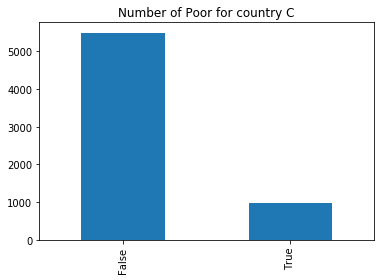

In [13]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [14]:
#a_train.info()
#b_train.info()
#c_train.info()

In [12]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals   使用get_dummies进行one-hot编码
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df


In [13]:
print("Country A")
aX_train = pre_process_data(a_train.drop('poor', axis=1))
ay_train = np.ravel(a_train.poor)

print("\nCountry B")
bX_train = pre_process_data(b_train.drop('poor', axis=1))
by_train = np.ravel(b_train.poor)

print("\nCountry C")
cX_train = pre_process_data(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor)


Country A
Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)

Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)


In [17]:
#aX_train.head()
bX_train.head()
#cX_train.head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,rljjAmaN_akDoa,rljjAmaN_fEsQq,rljjAmaN_gPPdN,ChbSWYhO_BgSQe,ChbSWYhO_Enull,ChbSWYhO_LgZDV,ChbSWYhO_OPpaN,ChbSWYhO_fWqni,ChbSWYhO_zmaYX,country_B
id,,,,,,,,,,,,,,,,,,,,,
57071,-0.060772,0.065928,0.687955,0.0,-0.890950,0.000000,0.0,0.000000,0.087650,0.569923,...,0,0,0,0,1,0,0,0,0,1
18973,-0.412754,-0.928796,1.034898,0.0,-0.890950,0.000000,0.0,0.000000,-0.891198,0.192433,...,0,0,0,0,1,0,0,0,0,1
20151,-0.412754,2.055376,1.104287,0.0,0.258037,0.000000,0.0,0.000000,2.045347,0.720918,...,0,0,0,0,1,0,0,0,0,1
5730,0.643192,0.397503,-1.130026,0.0,0.258037,-0.067086,0.0,0.024975,0.413933,0.003688,...,0,0,0,0,1,0,0,0,0,1
35033,3.459047,-0.265647,-0.991249,0.0,0.258037,-1.271564,0.0,-1.899275,-0.238632,0.381178,...,0,0,0,0,1,0,0,0,0,1


In [14]:
numTree = np.linspace(10,150,15)
K = 10  
kf = KFold(n_splits=K)
accuracyList = np.zeros(len(numTree))
print(numTree)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.]


In [15]:
from sklearn.ensemble import RandomForestClassifier

def train_model(features, labels, **kwargs):
    numTree = np.linspace(10,150,15)
    K = 10  
    kf = KFold(n_splits=K)
    accuracyList = []
    for i in numTree:
        # instantiate model
        print(i)
        num = int(i)
        model_test = RandomForestClassifier(n_estimators=num, random_state=0)
        accuracy = 0
        for train_indices, test_indices in kf.split(features):
            #print(train_indices)
            train_labels = labels[train_indices]
            test_labels = labels[test_indices[0:-1]]
            #print(train_labels.shape, test_labels.shape)
            
            test_features = features[test_indices[0]:test_indices[-1]]
            
            train_features = features.drop(features.index[test_indices[0]:test_indices[-1]+1])
            #.drop(aX_train.index[0:5])
            #print(train_indices[819:825],train_indices.shape)
            
            #print(train_features.shape,test_features.shape)
            # train model
            model_test.fit(train_features, train_labels)
    
            # get a (not-very-useful) sense of performance
            accuracy = accuracy + model_test.score(test_features, test_labels)
            
        accuracyList.append(accuracy/10) 
    print(accuracyList)
    
    

    
    number_of_estimator = int(numTree[accuracyList.index(max(accuracyList))])
    print(number_of_estimator)
    # instantiate model
    model = RandomForestClassifier(n_estimators=number_of_estimator, oob_score = True, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    
    print(f"In-sample accuracy: {accuracy:0.2%}")
    return model

In [16]:
'''
def train_model(features, labels, **kwargs):
    
    # instantiate model
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print(f"In-sample accuracy: {accuracy:0.2%}")
    
    return model
    
'''

'\ndef train_model(features, labels, **kwargs):\n    \n    # instantiate model\n    model = RandomForestClassifier(n_estimators=50, random_state=0)\n    \n    # train model\n    model.fit(features, labels)\n    \n    # get a (not-very-useful) sense of performance\n    accuracy = model.score(features, labels)\n    print(f"In-sample accuracy: {accuracy:0.2%}")\n    \n    return model\n    \n'

In [17]:
model_a = train_model(aX_train, ay_train)

10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
[0.7920161410405312, 0.80971663837517482, 0.8165539474076059, 0.81960570594716931, 0.82082581375264296, 0.82436314363143626, 0.82228788826349797, 0.82668200363322308, 0.82558399594984944, 0.82558384704726162, 0.82631659668245017, 0.82778120253730003, 0.82839140534262479, 0.82802584948926405, 0.82826960302570052]
130
In-sample accuracy: 100.00%


In [109]:
#model_a = train_model(aX_train, ay_train)
model_b = train_model(bX_train, by_train)


10.0


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some in

20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
In-sample accuracy: 100.00%


In [110]:
model_c = train_model(cX_train, cy_train)

10.0


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some in

20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
In-sample accuracy: 100.00%


In [18]:
# process the test data
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
#b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
#c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)


In [19]:
a_preds = model_a.predict_proba(a_test)
#b_preds = model_b.predict_proba(b_test)
#c_preds = model_c.predict_proba(c_test)

In [22]:
a_preds

array([[ 0.74615385,  0.25384615],
       [ 0.73076923,  0.26923077],
       [ 0.74615385,  0.25384615],
       ..., 
       [ 0.72307692,  0.27692308],
       [ 0.76923077,  0.23076923],
       [ 0.75384615,  0.24615385]])

In [29]:
[a_preds[i] for i in range(len(a_preds)) if a_preds[i][0]>0.5]

[array([ 0.74615385,  0.25384615]),
 array([ 0.73076923,  0.26923077]),
 array([ 0.74615385,  0.25384615]),
 array([ 0.70769231,  0.29230769]),
 array([ 0.73076923,  0.26923077]),
 array([ 0.71538462,  0.28461538]),
 array([ 0.76923077,  0.23076923]),
 array([ 0.68461538,  0.31538462]),
 array([ 0.76923077,  0.23076923]),
 array([ 0.75384615,  0.24615385]),
 array([ 0.79230769,  0.20769231]),
 array([ 0.76153846,  0.23846154]),
 array([ 0.74615385,  0.25384615]),
 array([ 0.70769231,  0.29230769]),
 array([ 0.73076923,  0.26923077]),
 array([ 0.79230769,  0.20769231]),
 array([ 0.73846154,  0.26153846]),
 array([ 0.8,  0.2]),
 array([ 0.71538462,  0.28461538]),
 array([ 0.75384615,  0.24615385]),
 array([ 0.74615385,  0.25384615]),
 array([ 0.66923077,  0.33076923]),
 array([ 0.70769231,  0.29230769]),
 array([ 0.76923077,  0.23076923]),
 array([ 0.8,  0.2]),
 array([ 0.74615385,  0.25384615]),
 array([ 0.63076923,  0.36923077]),
 array([ 0.76153846,  0.23846154]),
 array([ 0.78461538,

In [24]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [26]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
#b_sub = make_country_sub(b_preds, b_test, 'B')
#c_sub = make_country_sub(c_preds, c_test, 'C')

In [27]:
a_sub

,country,poor
id,,
418,A,0.253846
41249,A,0.269231
16205,A,0.253846
97501,A,0.292308
67756,A,0.269231
17938,A,0.284615
19036,A,0.230769
61587,A,0.315385
57571,A,0.230769


In [117]:
print(a_sub.shape, b_sub.shape,c_sub.shape)

(4041, 2) (1604, 2) (3187, 2)


In [118]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [119]:
submission.head()

,country,poor
id,,
418,A,0.253846
41249,A,0.269231
16205,A,0.253846
97501,A,0.292308
67756,A,0.269231


In [120]:
submission.tail()

,country,poor
id,,
6775,C,0.3125
88300,C,0.2375
35424,C,0.1875
81668,C,0.2625
98377,C,0.1250


In [121]:
submission.to_csv('submission.csv')

In [122]:
submission.shape

(8832, 2)

In [34]:
a_sub.shape

(4041, 2)